In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.svm import LinearSVC
%matplotlib inline

Sacamos los datos y los deshuesamos para poder compararlos mas facilmente. 

In [2]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = np.array(data[['LoyalCH','PriceDiff']])
Y1 = np.array(data['Purchase'])
Y1[Y1=='CH'] = 0
Y1[Y1=='MM'] = 1
X1 = X[:,0]
X2 = X[:,1]
Y_N= Y1[Y1==0]
Y_S= Y1[Y1==1]
X1_N = X1[Y1==0]
X1_S = X1[Y1==1]
X2_N = X2[Y1==0]
X2_S = X2[Y1==1]
#print(np.shape(X1))
#print(np.shape(Y1))
Y1.dtype
print(np.shape(X1))

(1070,)


Ahora realizamos un metodo que recorre un amplio rango de posibilidades de intercepciones como de pendientes, 
usando como factor de comparación lo que se llama acá, el factor de eficiencia $e=\frac{neg_{correctas}}{neg_{totales}} \times \frac{pos_{correctas}}{pos_{totales}}$  Este va de 0 a 1. 

In [3]:
intersecciones = np.linspace(-10,10,100)
pendientes = np.linspace(-10,10,100)
NTotal = len(Y_N)
STotal = len(Y_S)
eficiencias = [0]
trios =[]
for i in intersecciones:
    for j in pendientes:
        ns = 0
        nn = 0
        for y in range(STotal):
            if (i+j*X1_S[y])>(X2_S[y]):
                ns=ns+1
        for y in range(NTotal):
            if (i+j*X1_N[y])<(X2_N[y]):
                nn=nn+1
        estaEficiencia = (nn/NTotal)*(ns/STotal)
        eficiencias.append(estaEficiencia) 
        if max(eficiencias)==estaEficiencia:
            trios.append([i,j,estaEficiencia])


Visualizemos el resultado imprimiendo los coeficientes y la eficiencia.

[1.5151515151515156, -2.525252525252525, 0.6840812189452112]


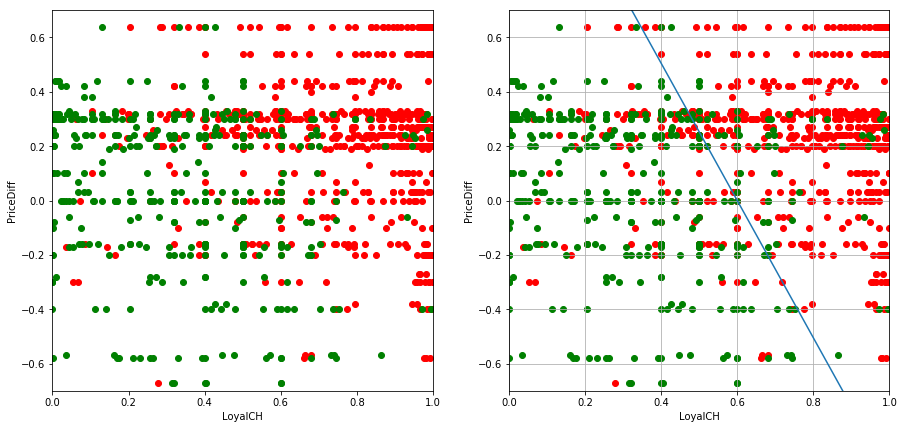

In [4]:
interseccion = trios[-1][0]
pendiente = trios[-1][1]
x = np.linspace(0,1,100)
recta = interseccion + x*pendiente
plt.figure(figsize=(15,7))

plt.subplot(121)
_ = plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
_ = plt.scatter(X1[Y1==1], X2[Y1==1], c='g')
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')

plt.subplot(122)
_ = plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
_ = plt.scatter(X1[Y1==1], X2[Y1==1], c='g')
_ = plt.plot(x,recta)
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')
_ = plt.grid(alpha=1,linestyle='-')
print(trios[-1])

Tratemos ahora de usar la funcion de sklearn. 

In [5]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = data[['LoyalCH','PriceDiff']]
Y1 = data['Purchase']
sv = LinearSVC()
sv.fit(X,Y1)
o = sv.decision_function(X)
YY, XX = np.meshgrid(X2, X1)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

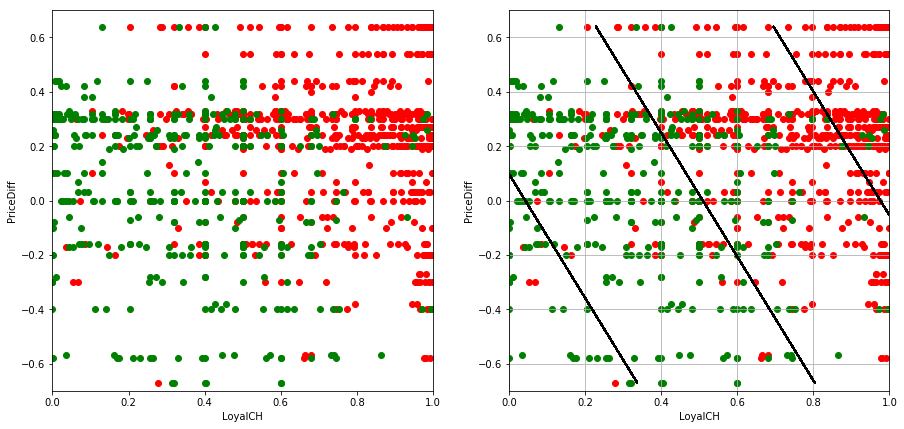

In [6]:

plt.figure(figsize=(15,7))

plt.subplot(121)
_ = plt.scatter(X1[Y1=='CH'], X2[Y1=='CH'], c='r')
_ = plt.scatter(X1[Y1=='MM'], X2[Y1=='MM'], c='g')
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')

plt.subplot(122)
_ = plt.scatter(X1[Y1=='CH'], X2[Y1=='CH'], c='r')
_ = plt.scatter(X1[Y1=='MM'], X2[Y1=='MM'], c='g')
_ = plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=[':', '-', ':'])
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')
_ = plt.grid(alpha=1,linestyle='-')

In [49]:
data2 = pd.read_csv('Cars93.csv')
data2 = data2.dropna()
C = np.array(data2[["Fuel.tank.capacity", "Horsepower", "Length", "Rev.per.mile", "Turn.circle", "Weight"]])
H = np.array(data2['MPG.city'])
prom = np.mean(H)
H[H<prom] = 0
H[H>prom] = 1
print(H==1)

[ True False False False False False False False False False False  True
  True False False False False False False  True False False False False
  True False  True False False False  True False False  True  True  True
  True  True  True False  True False False False False False False  True
  True  True False False False False  True False  True  True False  True
 False False False  True False False False False False  True  True  True
 False  True  True  True False  True False False False False]


/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/skl

IndexError: index 20 is out of bounds for axis 0 with size 20

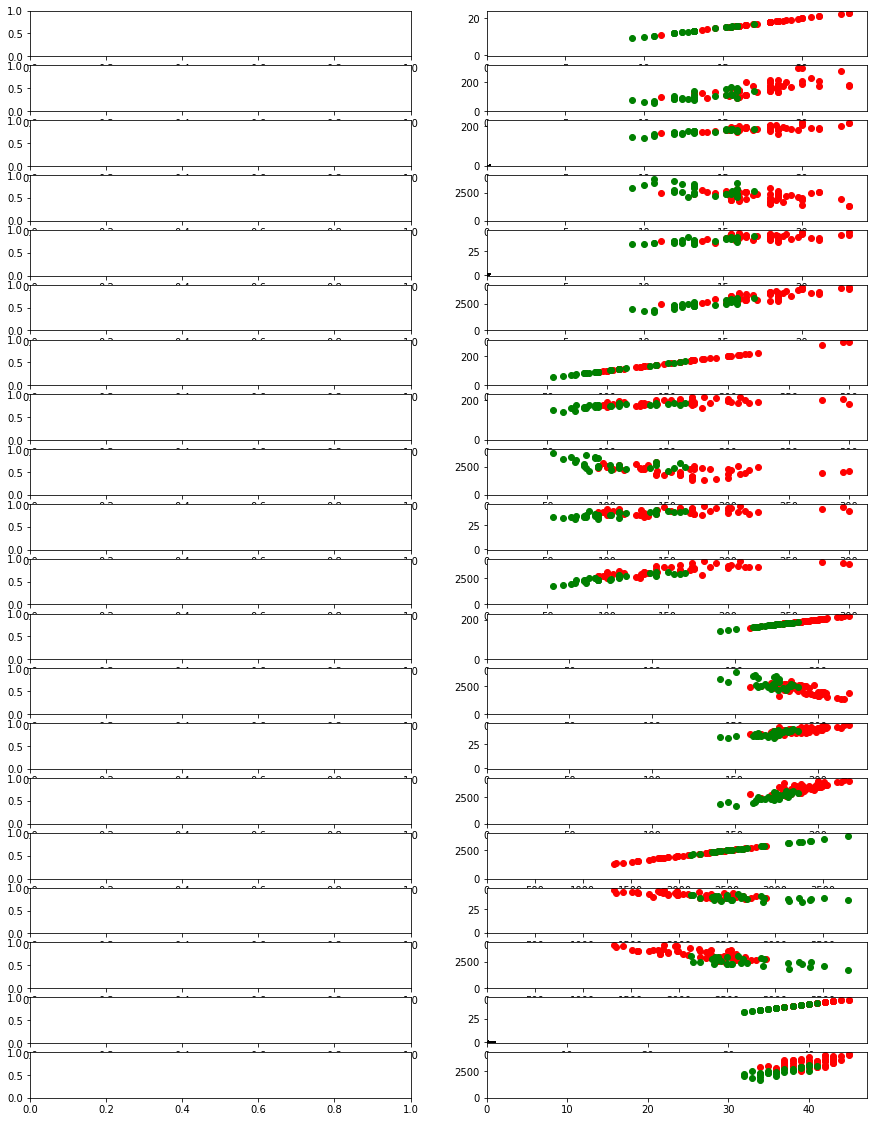

In [55]:
fig, axs = plt.subplots(20,2, figsize=(15, 20))
num=-1
for j in np.arange(6):
    for i in np.arange(j,6):
        X = np.vstack([C[:,j],C[:,i]]).T
        sv = LinearSVC()
        sv.fit(X,H)
        o = sv.decision_function(X)
        YY, XX = np.meshgrid(X2, X1)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = sv.decision_function(xy).reshape(XX.shape)
        num=num+1
        x1=X[:,0]
        x2=X[:,1]
        axs[num,1].scatter(x1[H==0], x2[H==0], c='r')
        axs[num,1].scatter(x1[H==1], x2[H==1], c='g')
        axs[num,1].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=[':', '-', ':'])
